In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['agg.path.chunksize'] = 10000

In [3]:
array = np.load('/home/calum/Documents/Mphys_data/match_catalogs/sdss_neighbours.npy')

In [4]:
array.shape

(465442, 5)

In [5]:
def plot_hist(array,bin_num):
    weights = np.ones_like(array)/len(array)
    n, bins, patches = plt.hist(array,bins=bin_num,weights=weights)
    plt.close()
    return bins, n

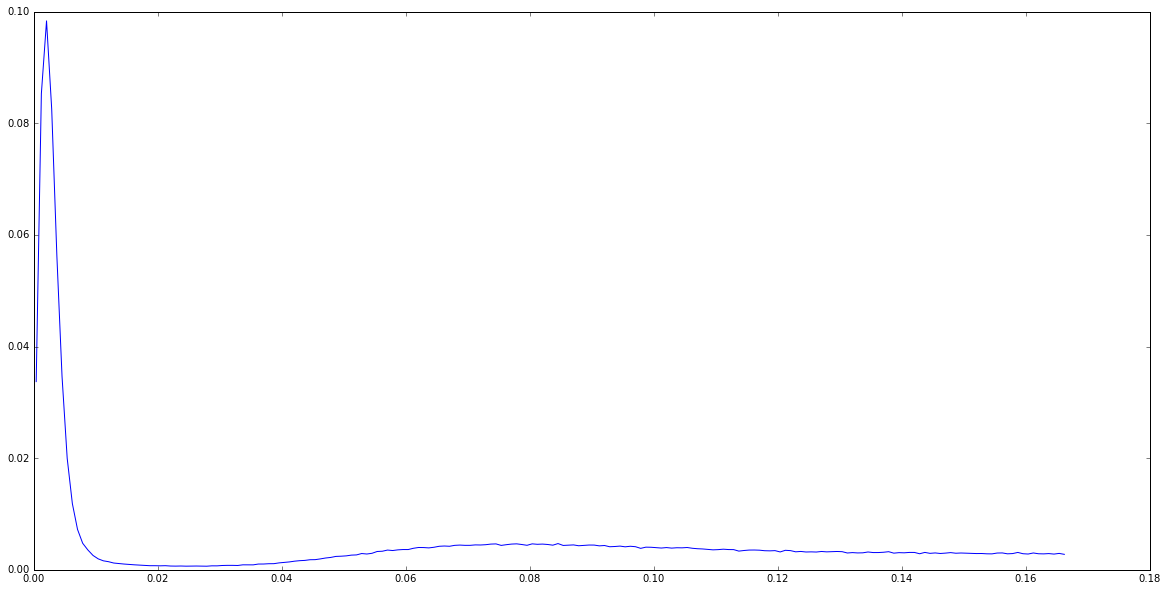

In [6]:
bins, n = plot_hist([row[1] for row in array],200)

step = 0.5*(bins[1]-bins[0])

plt.figure(figsize=(20,10))
plt.plot(bins[:-1]+step, n)

(0, 0.02)

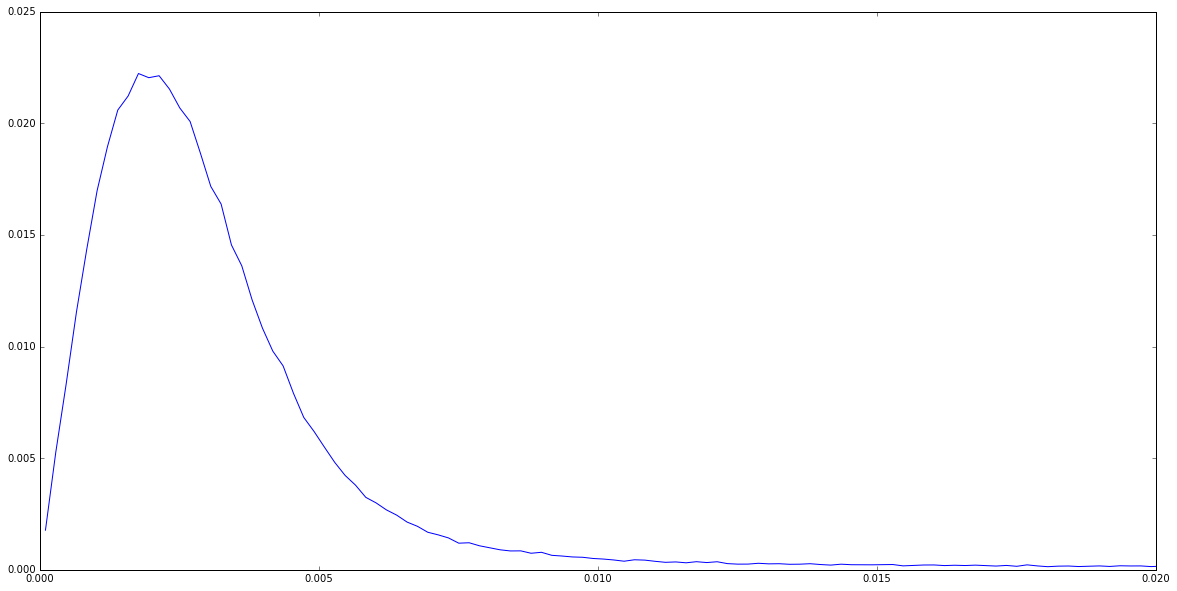

In [7]:
bins, n = plot_hist([row[1] for row in array],900)

step = 0.5*(bins[1]-bins[0])

plt.figure(figsize=(20,10))
plt.plot(bins[:-1]+step, n)
plt.xlim(0,0.02)

In [8]:
matched_array = np.load('/home/calum/Documents/Mphys_data/match_catalogs/sdss_match.npy')
matched_array.shape

(132473, 5)

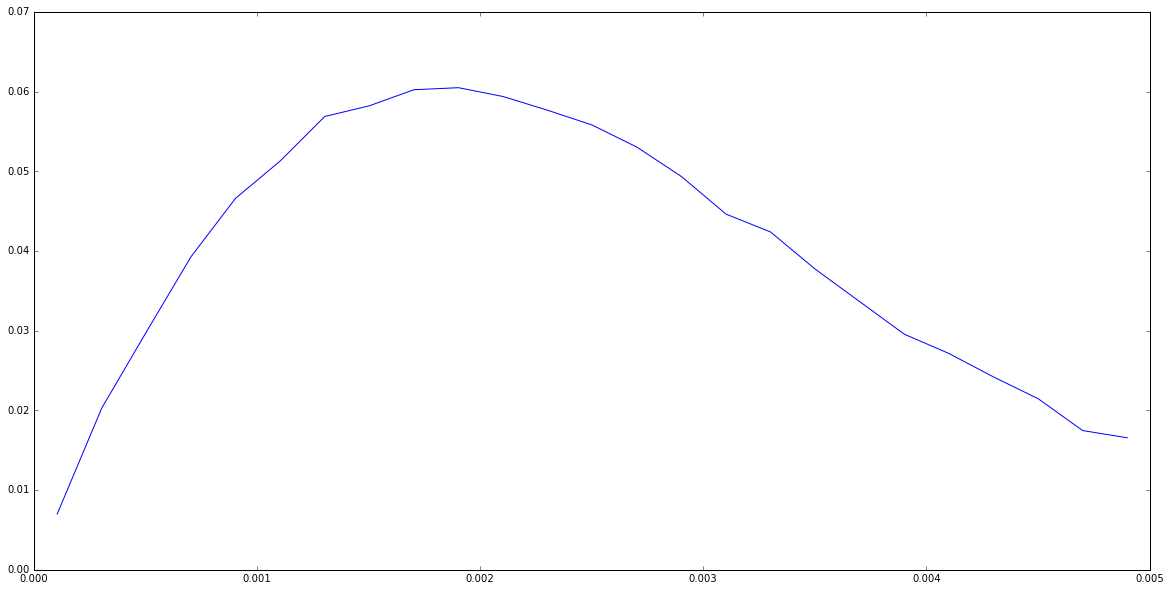

In [9]:
bins, n = plot_hist([row[1] for row in matched_array],25)

step = 0.5*(bins[1]-bins[0])

plt.figure(figsize=(20,10))
plt.plot(bins[:-1]+step, n)

In [12]:
link_array = np.load('/home/calum/Documents/Mphys_data/match_catalogs/check_my_links.npy')
link_array.shape

(502677, 4)

In [13]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [ ]:
hist_array = []

for row in link_array:
    dr7_coord = SkyCoord(ra=row[0]*u.degree, dec=row[1]*u.degree)
    dr13_coord = SkyCoord(ra=row[2]*u.degree, dec=row[3]*u.degree)
    sep = dr7_coord.separation(dr13_coord)
    hist_array.append(sep.radian)

In [ ]:
len(hist_array)

In [ ]:
bins, n = plot_hist(hist_array,200)

step = 0.5*(bins[1]-bins[0])

plt.figure(figsize=(20,10))
plt.plot(bins[:-1]+step, n)

In [72]:
array = np.load('/home/calum/Documents/Mphys_data/match_catalogs/dust_extinction_dust2.npy')
array.shape

(1714064, 6)

In [172]:
x = np.array([row[4] for row in array if row[2] < 0.08 and row[2]>0.07])
y = np.array([row[5] for row in array if row[2] < 0.08 and row[2]>0.07])
len(x),len(y)

(149580, 149580)

In [169]:
def plot_contour(x_contour,y_contour, n_bins,cmap):            
    # now let's overplot some contours. First we have to make a 2d
    # histogram of the point distribution.
    vals, xedges, yedges = np.histogram2d(x_contour, y_contour, bins=n_bins)
       
    # Now we have the bin edges, but we want to find the bin centres to
    # plot the contour positions - they're half way between the edges:
    xbins = 0.5 * (xedges[:-1] + xedges[1:])
    ybins = 0.5 * (yedges[:-1] + yedges[1:])
    
    # now plot the contours
    plt.contourf(xbins, ybins, -vals.T, 20, zorder=10, cmap=cmap)
    plt.xlabel('RA')
    plt.ylabel('DEC')
    title_str = 'Cosmic web'
    plt.title(title_str)
    plt.colorbar()

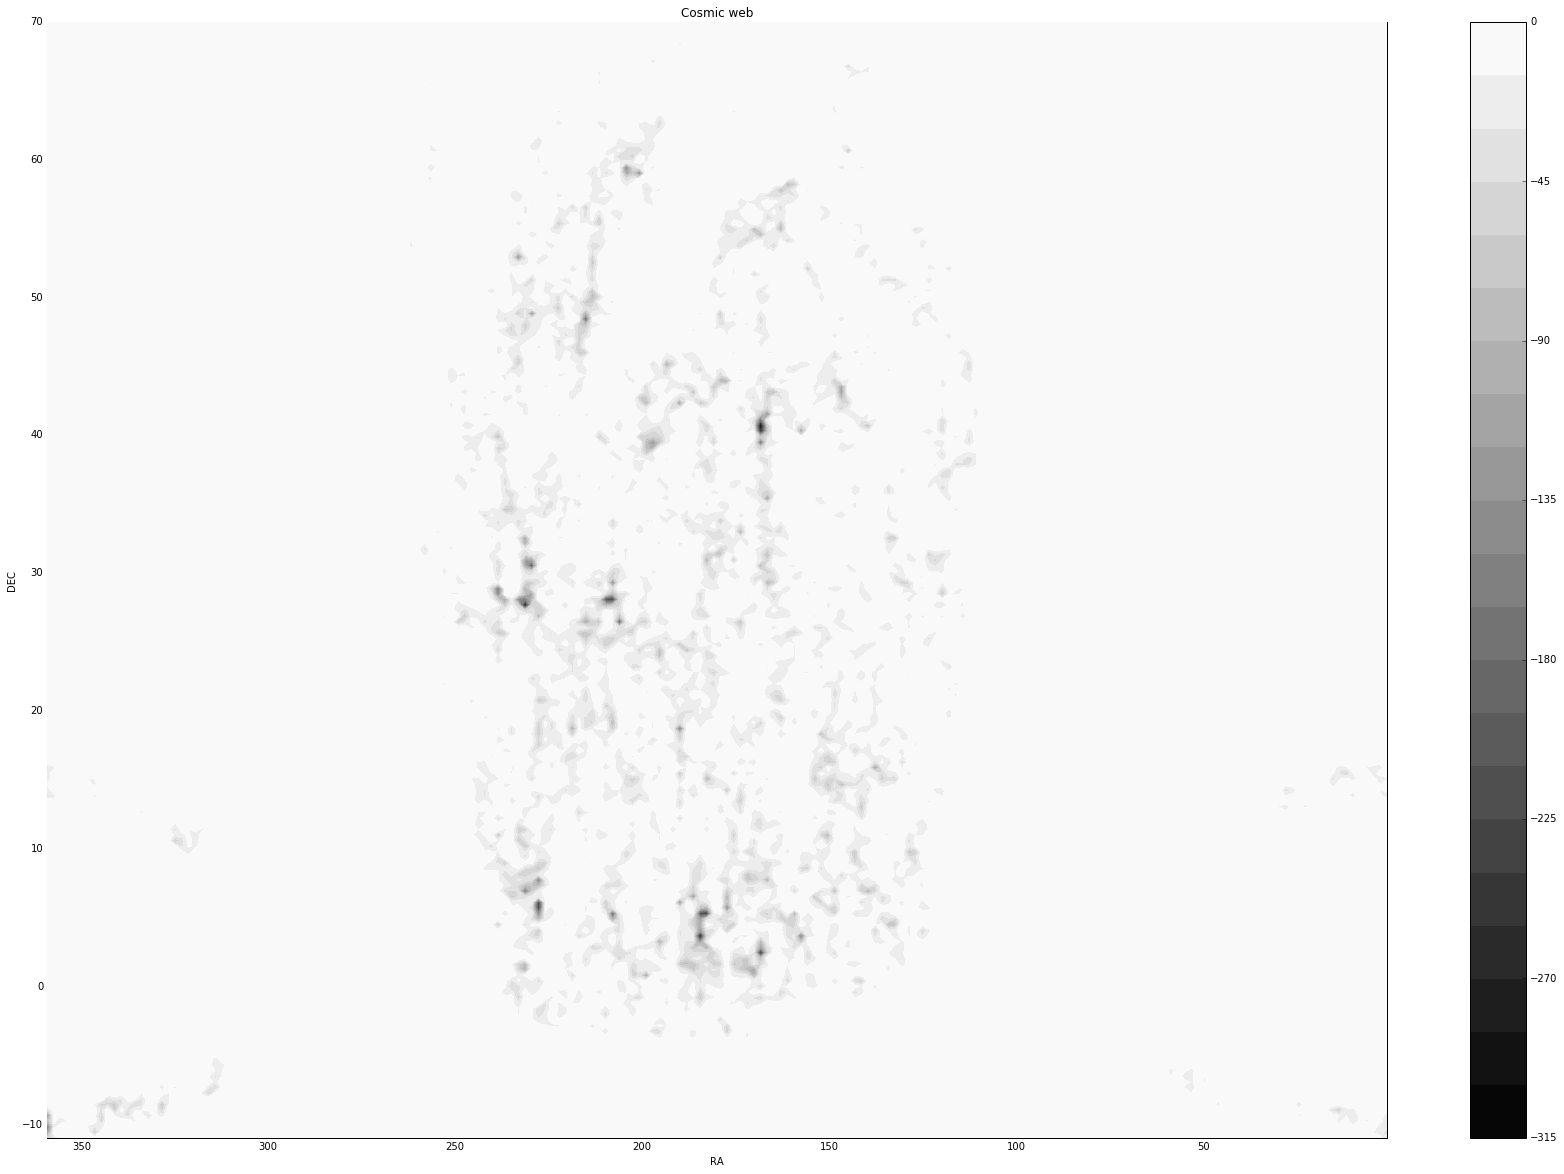

In [177]:
plt.figure(figsize=(30,20))
plot_contour(x,y,200,'gray')
plt.gca().invert_xaxis()

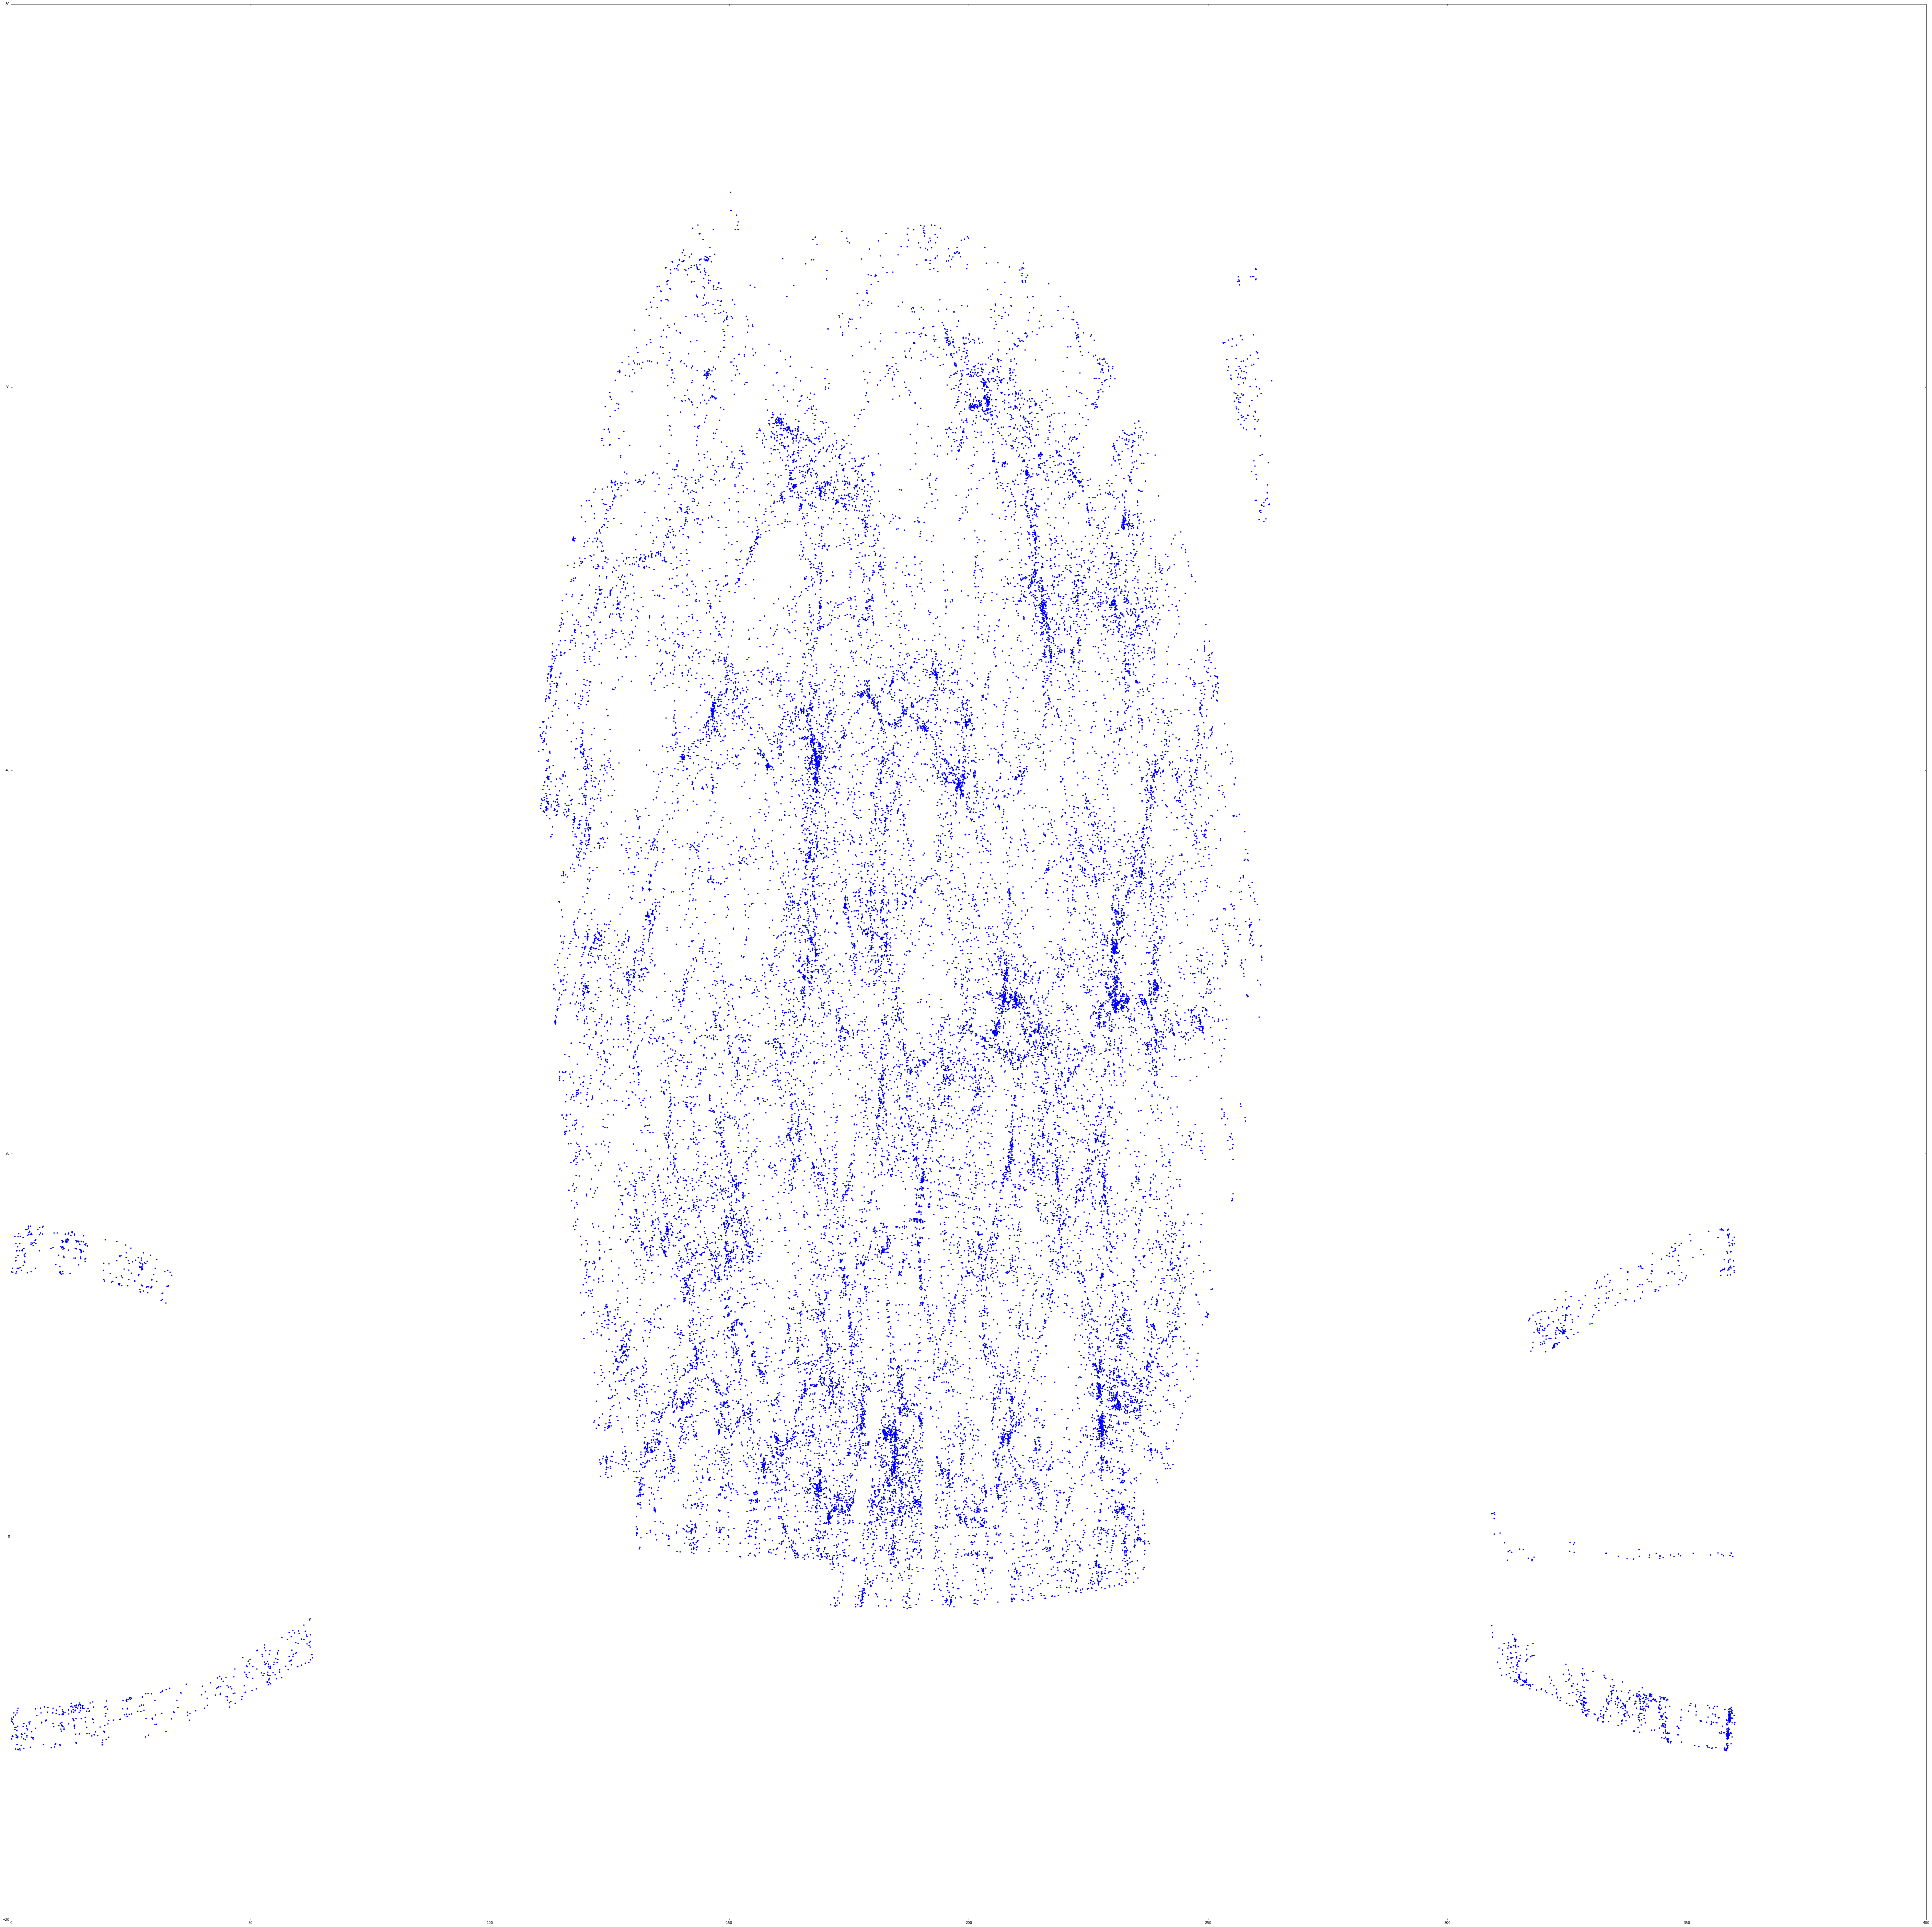

In [180]:
plt.figure(figsize=(100,100))
plt.plot(x,y,'.')
plt.savefig('cosmic_web.png')